# 1. Logistic Regression

In [40]:
import random
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import diff
from math import log
from numpy import linalg

In [41]:
def Random_Normal_Num():
    random_array = np.array([random.random() for x in range(12)])
    random_num = random_array.sum()-6
    return random_num

def Random_Gauss_Generator(mean, var):
    return (var**(1/2))*Random_Normal_Num() + mean

def sigmoid(z):
    try:
        return 1/(1+math.exp(-z))
    except OverflowError:
        return overflow_determine(-z)

def draw_pred(w, Gradient, counter):
    x_range = np.arange(np.amin(xs)-0.3*vx1, np.amax(xs)+0.3*vx1, 0.1)
    plt.scatter(D1_x, D1_y, marker='.', alpha=0.5, color='blue')
    plt.scatter(D2_x, D2_y, marker='.', alpha=0.5, color='red')
    plt.plot(x_range, -(w[0]+w[1]*x_range)/w[2])
    plt.show()
    print("%d data have been trained" %counter)
    print("\nw : ", w)
    print("loss : ", loss)
    print("---------------------\n")

In [42]:
def overflow_determine(x):
    print("OVERFLOWEXCEPTION EXCEPTION")
    f_MAX = sys.float_info.max
#     f_MIN = sys.float_info.min
    if x > 0:
        return f_MAX
    else:
        return 0

def hession(X, z, rows):
    D = np.zeros((rows, rows))
    for i in range(rows):
        try:
            tmp_e = math.exp(-z[i])
        except OverflowError:
            print("OVERFLOWEXCEPTION EXCEPTION")
            print(z[i])
            tmp_e = overflow_determine(-z[i])
            
        if tmp_e>=1.e+5 or tmp_e<=-1.e+5:
            D[i][i] = 0
        elif tmp_e<=0.00001 and tmp_e>=-0.00001:
            D[i][i] = 1
        else:
            D[i][i] = tmp_e / ((1+tmp_e**2))
    return np.matmul(np.matmul(X.T, D), X)


def gradient(X, Y, z, rows):
    Y_sigmoid = []
    loss = 0
    for i in range(rows):
        tmp_sigmoid = sigmoid(z[i])
        Y_sigmoid.append(tmp_sigmoid)
        loss += cal_loss(Y[i], tmp_sigmoid)
    return loss/rows, np.matmul(X.T, (Y_sigmoid-Y).reshape(rows, 1))


def cal_loss(Y, Y_pred):
    try :
        return -1*(Y*log(Y_pred) + (1-Y)*log(1-Y_pred))
    except ValueError:
        return 0

In [43]:
data_num = 1000
mat_row = 2*data_num

mx1 = 0
my1 = 0
vx1 = 1
vy1 = 1

mx2 = 5
my2 = 5
vx2 = 1
vy2 = 1

D1=[]
D1_x=[]
D1_y=[]

D2=[]
D2_x=[]
D2_y=[]

X=[]
Y=[]

for i in range(data_num):
    x = Random_Gauss_Generator(mx1, vx1)
    y = Random_Gauss_Generator(my1, vy1)
    D1_x.append(x)
    D1_y.append(y)
    D1.append((x, y))
    X.append([1, x, y])
    Y.append(0)

    x = Random_Gauss_Generator(mx2, vx2)
    y = Random_Gauss_Generator(my2, vy2)
    D2_x.append(x)
    D2_y.append(y)
    D2.append((x, y))
    X.append([1, x, y])
    Y.append(1)

X = np.asarray(X).reshape(mat_row, 3)
Y = np.array(Y)

# xs records whole x points
xs = []
xs = np.append(xs, D1_x)
xs = np.append(xs, D2_x)

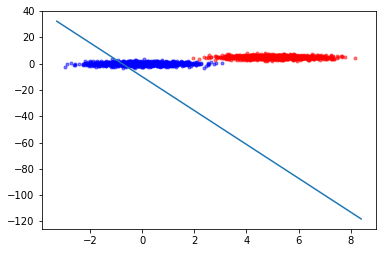

1 data have been trained

w :  [6.47881067 8.33039834 0.64800748]
loss :  5.443250765158339
---------------------



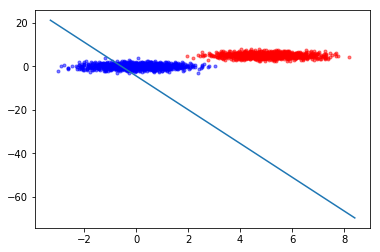

4 data have been trained

w :  [0.5331955  0.94120168 0.12130026]
loss :  0.584388020236343
---------------------



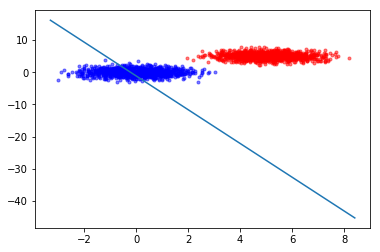

9 data have been trained

w :  [0.20452095 0.95847435 0.18271393]
loss :  0.4801950876804009
---------------------



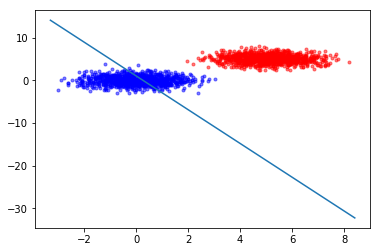

16 data have been trained

w :  [-0.25434775  0.97653056  0.24671804]
loss :  0.3599347745114723
---------------------



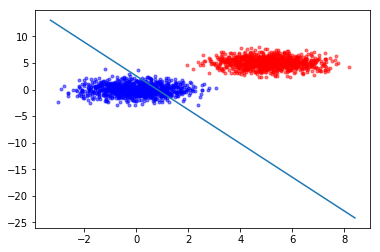

25 data have been trained

w :  [-0.79962804  0.99082115  0.3115581 ]
loss :  0.2498049010001646
---------------------



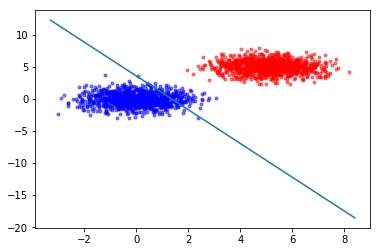

36 data have been trained

w :  [-1.37552606  1.00008043  0.37901065]
loss :  0.16580061887167347
---------------------



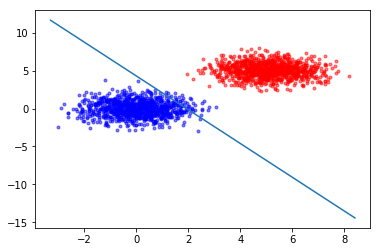

49 data have been trained

w :  [-1.9432535   1.00535043  0.45114466]
loss :  0.10886983975394378
---------------------

50 data have been trained...


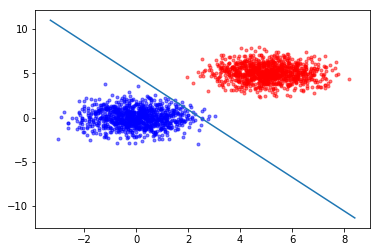

64 data have been trained

w :  [-2.4853402   1.00818327  0.52876246]
loss :  0.07258171494212542
---------------------



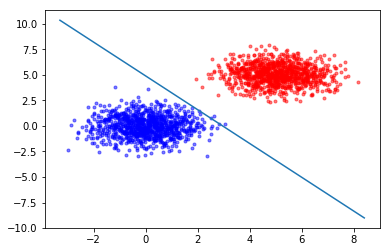

81 data have been trained

w :  [-2.99406531  1.00973487  0.61041206]
loss :  0.05006849234351517
---------------------

100 data have been trained...


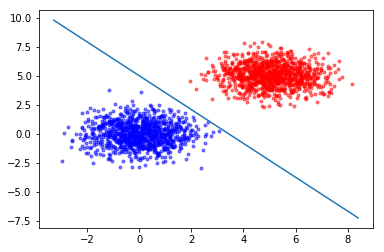

100 data have been trained

w :  [-3.46176421  1.01065868  0.6927491 ]
loss :  0.036262705739428865
---------------------



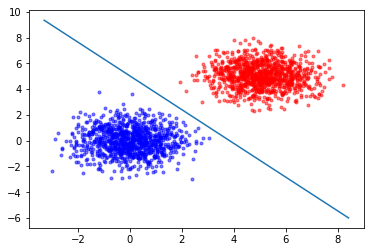

121 data have been trained

w :  [-3.87836247  1.01127274  0.77130376]
loss :  0.027837868423665885
---------------------



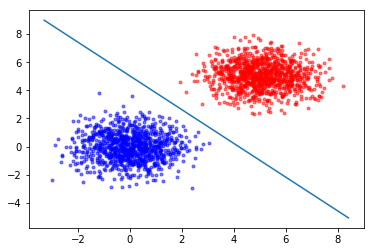

144 data have been trained

w :  [-4.23371231  1.01171723  0.84158111]
loss :  0.02270338223875438
---------------------

150 data have been trained...


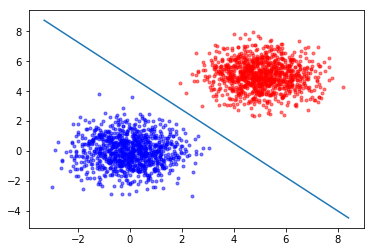

167 data have been trained

w :  [-4.50182441  1.01202394  0.89624328]
loss :  0.019762011107162022
---------------------

The result has Converged.


In [46]:
w = np.array([-12,-10,4])
lr = 0.1
pre_loss = 100
counter = 0
# print(z)

while(1):
    pre_loss = loss
    w = w/w.max()
    z = np.matmul(X, w.T)
    Hession = hession(X, z, mat_row)
    loss, Gradient = gradient(X, Y, z, mat_row)
    
    if linalg.cond(Hession) < 1/sys.float_info.epsilon: 
        update = np.matmul(np.linalg.inv(Hession), Gradient).reshape(1,3)
        update = np.squeeze(update)
    else:
        update = Gradient

    w = w - lr * update
    counter += 1
    
#     if loss<=0.002:
#         break
#     elif counter>=5000:
#         break
    if loss>pre_loss:
        lr *= 0.5
    else:
        if abs(loss - pre_loss) < 1e-4:
            break
    
    if counter%50==0:
        print("%d data have been trained..." %counter)
    
    if math.sqrt(counter) - int(math.sqrt(counter)) == 0:
        draw_pred(w, Gradient, counter)
#         print(pre_loss)
        
draw_pred(w, Gradient, counter)

print("The result has Converged.")
w /= w[2]
# print("\nThe final line is : ")
# print("Y = %.2fX + %.2f" %(w[1], w[0]))

# 2. EM algorithm

In [1]:
import numpy as np
import math
from math import log
import sys
import matplotlib.pyplot as plt

In [2]:
# mu[k,n] : In cluster k, the probability if n_th pixel is 1. (SIZE = K * D)
# z[n,k]  : Probability that the n_th graph is cluster k. (SIZE = N * K)
# pi[k,1] : Probability that cluster i appears. (SIZE = K * 1)
# N_k = z_0k + z_1k + ... + z_Nk

In [28]:
def read_img(filename):
    with open(filename, 'rb') as fo:
        buf = fo.read()
        
        index = 0
        header = np.frombuffer(buf, '>i', 4, index)
        
        index += header.size * header.itemsize
        data = np.frombuffer(buf, '>B', header[1] * header[2] * header[3], index).reshape(header[1], -1)
        return header[1], data
    
    
def read_lab(filename):
    with open(filename, 'rb') as fo:
        buf = fo.read()
        
        index = 0
        header = np.frombuffer(buf, '>i', 2, index)
        
        index += header.size * header.itemsize
        data = np.frombuffer(buf, '>B', header[1], index)
        return data

def L2loss(X, Y):
    dist = np.linalg.norm(X-Y)
    return dist
    
def EM(train_image, pi, mu, z):

    counter = 0
    N, D = train_image.shape
    tmp_mu = np.copy(mu)
    
    while(1):

        for i in range(N):
            for k in range(10):
                try:
                    z[i][k] = log(pi[k])
                except ValueError:
                    print("Exception1")
                    print(pi)
                    print(OUO)
                    z[i][k] = log(1e-5)
                for d in range(D):
                    try:
                        z[i][k] += log(mu[k][d]**train_image[i][d] * (1-mu[k][d])**(1-train_image[i][d]) + 1e-7)
                    except:
                        print('Exception2')
                        print(mu[k][d], train_image[i][d])
                        print((mu[k][d]**train_image[i][d]) * ((1-mu[k][d])**(1-train_image[i][d])))
                        z[i][k] += train_image[i][d]*log(1e-5)
            z[i] -= z[i].max()
            z[i] = np.exp(z[i])
            z[i] = z[i] / z[i].sum()
        print("E_step DONE!")

        N_k = z.sum(axis=0)
        pi = N_k / N_k.sum()
        for k in range(10):
            mu_k = 0
            for i in range(N):
                mu_k += z[i][k] * train_image[i]
            tmp_mu[k] = mu_k / N_k[k]
        print("M_step DONE!")
        loss = L2loss(tmp_mu, mu)
        print("loss : %.2f\n" %loss)
        mu = np.copy(tmp_mu)
        if loss<1e-5:
            print("EM Converges after %d iterations" %(counter+1))
            break
        counter += 1
    print("%d EM done!\n" %counter)
    return pi, mu, z

def pred_z_func(train_image, pi, mu):
    N, D = train_image.shape
    pred_z = np.zeros((N, ))
    z = np.zeros((N, 10))
    for i in range(N):
        for k in range(10):
            try:
                z[i][k] = log(pi[k])
            except ValueError:
                z[i][k] = log(1e-5)
            for d in range(28*28):
                try:
                    z[i][k] += log(mu[k][d]**train_image[i][d] * (1-mu[k][d])**(1-train_image[i][d]) + 1e-7)
                except:
                    z[i][k] += train_image[i][d]*log(1e-5)
        pred_z[i] = np.argmax(z[i])
    return pred_z

In [14]:
train_num, train_image = read_img("train-images-idx3-ubyte")
train_label = read_lab("train-labels-idx1-ubyte")

train_image = np.array(train_image)

train_image[train_image<128] = 0
train_image[train_image>=128] = 1

# print(train_image.max())
# print(train_image.min())

In [15]:
print(train_label[:10])

[5 0 4 1 9 2 1 3 1 4]


In [16]:
# Count total number of each label
label_count = np.zeros(10)
for i in range(10):
    label_count[i] = np.count_nonzero(train_label==i)

zero_count = np.zeros(train_num)
one_count = np.zeros(train_num)
for i in range(train_num):
    zero_count[i] = np.count_nonzero(train_image[i]==0)
one_count = 28*28*np.ones(train_num) - zero_count

In [17]:
train_image = train_image[:1000]
N, D = train_image.shape

z = np.zeros((N, 10))
# mu = np.empty((10, D))
# pi = np.empty((10, 1))
mu = np.random.random((10, D))
pi = np.random.random((10, 1)) 
pi = pi / pi.sum()

print("z : ", z)
print()
print("mu : ", mu)
print()
print("pi : ", pi)
print()

z :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

mu :  [[0.49806675 0.54859315 0.16871271 ... 0.03838986 0.76176234 0.33566041]
 [0.57947279 0.00294702 0.85828443 ... 0.12852232 0.79470935 0.88477848]
 [0.71330935 0.77792014 0.79727004 ... 0.7388017  0.79005728 0.56731673]
 ...
 [0.19333386 0.79255279 0.45350924 ... 0.48789508 0.78358184 0.52994649]
 [0.95554894 0.91165447 0.38544376 ... 0.11205788 0.81016357 0.94156232]
 [0.48076385 0.81485863 0.95990142 ... 0.05276019 0.62163733 0.05851359]]

pi :  [[0.05542027]
 [0.13054332]
 [0.10416089]
 [0.09883673]
 [0.03484027]
 [0.05964572]
 [0.01398273]
 [0.14562875]
 [0.18135741]
 [0.1755839 ]]



In [26]:
# mu.fill(0.5) # The prob. that Pi will toss 1 is 0.5 at first
# pi.fill(0.1) # The prob. that Zi is i is 0.1 at first
pi, mu, z = EM(train_image, pi, mu, z)

print("z : ", z)
print()
print("mu : ", mu)
print()
print("pi : ", pi)
print()

E_step DONE!
M_step DONE!
loss : 2.95
E_step DONE!
M_step DONE!
loss : 2.05
E_step DONE!
M_step DONE!
loss : 1.44
E_step DONE!
M_step DONE!
loss : 1.00
E_step DONE!
M_step DONE!
loss : 0.81
E_step DONE!
M_step DONE!
loss : 0.46
E_step DONE!
M_step DONE!
loss : 0.34
E_step DONE!
M_step DONE!
loss : 0.41
E_step DONE!
M_step DONE!
loss : 0.37
E_step DONE!
M_step DONE!
loss : 0.41
E_step DONE!
M_step DONE!
loss : 0.29
E_step DONE!
M_step DONE!
loss : 0.24
E_step DONE!
M_step DONE!
loss : 0.34
E_step DONE!
M_step DONE!
loss : 0.23
E_step DONE!
M_step DONE!
loss : 0.19
E_step DONE!
M_step DONE!
loss : 0.25
E_step DONE!
M_step DONE!
loss : 0.18
E_step DONE!
M_step DONE!
loss : 0.20
E_step DONE!
M_step DONE!
loss : 0.23
E_step DONE!
M_step DONE!
loss : 0.31
E_step DONE!
M_step DONE!
loss : 0.31
E_step DONE!
M_step DONE!
loss : 0.28
E_step DONE!
M_step DONE!
loss : 0.26
E_step DONE!
M_step DONE!
loss : 0.07
E_step DONE!
M_step DONE!
loss : 0.11
E_step DONE!
M_step DONE!
loss : 0.06
E_step DONE!

In [19]:
pred_z = pred_z_func(train_image, pi, mu)

In [20]:
print(len(pred_z))
print(len(train_label))
print(pred_z[:10])
print(train_label[:10])

1000
60000
[9. 7. 7. 2. 2. 7. 2. 9. 2. 7.]
[5 0 4 1 9 2 1 3 1 4]


In [21]:
train_label = train_label[:1000]

In [22]:
from sklearn.metrics import confusion_matrix

count_y = [np.count_nonzero(train_label == i) for i in range(10)]
count_y_pred = [np.count_nonzero(pred_z == i) for i in range(10)]
print(count_y)
print(count_y_pred)

confusion_matrix(pred_z, train_label)

[97, 116, 99, 93, 105, 92, 94, 117, 87, 100]
[2, 25, 343, 85, 4, 17, 18, 354, 45, 107]


array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   1],
       [  0,   7,   0,   0,   0,   0,   0,   0,  18,   0],
       [  0, 105,  13,   6,  25,  25,   6,  87,  19,  57],
       [  7,   2,   6,   9,  19,   6,   4,   5,  12,  15],
       [  0,   0,   0,   2,   0,   2,   0,   0,   0,   0],
       [  0,   0,  16,   1,   0,   0,   0,   0,   0,   0],
       [ 18,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 66,   1,  35,  10,  60,  21,  84,  25,  27,  25],
       [  6,   0,   2,  12,   1,  19,   0,   0,   4,   1],
       [  0,   1,  27,  53,   0,  18,   0,   0,   7,   1]])

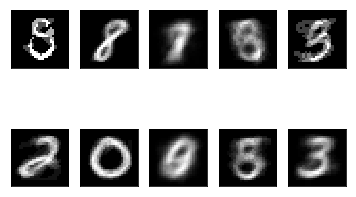

In [23]:
for i in range(10):
    plt.subplot(2,5,i+1)
    p = mu[i].reshape((28,28))
    plt.imshow(p, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [37]:
print(mu.max())
print(mu.min())

1.0
0.0


In [60]:
print(z[:2])

[[-2.07096714e+00 -3.12358073e+00 -2.46150379e+00 -6.90775528e+00
  -1.68347829e+00 -6.90775528e+00 -1.52367689e+00 -1.45548287e+00
  -2.26618974e+00 -1.88075596e+03]
 [-2.07096714e+00 -3.12358073e+00 -2.46150379e+00 -6.90775528e+00
  -1.68347829e+00 -6.90775528e+00 -1.52367689e+00 -1.45548287e+00
  -2.26618974e+00 -1.41333119e+03]]
